In [ ]:
"""
The data is for company X which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee.
Satisfaction Level
Last evaluation
Number of projects
Average monthly hours
Time spent at the company
Whether they have had a work accident
Whether they have had a promotion in the last 5 years
Departments (column sales)
Salary
Whether the employee has left

Objective
What type of employees are leaving? Determine which employees are prone to leave next. Present your results in the presentation sheet's presentation area.

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
exf=pd.ExcelFile("test.xlsx")
df=exf.parse("Existing employees")
df1=exf.parse("Employees who have left")

In [3]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [4]:
df1.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [5]:
print(df.isnull().sum())

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


In [6]:
print(df1.isnull().sum())

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


In [22]:
#checking for the job satisfaction greater then 60%
satjob=df[df["satisfaction_level"]>0.6]
print(((len(df)-len(satjob))/len(df))*100,"% People are less than 60% satisfied by job")
print(satjob["satisfaction_level"].mean())

36.13055652782639 % People are less than 60% satisfied by job
0.7987532538703795


In [23]:
#checking for the people who have left the job and their satisfaction
satjob1=df1[df1["satisfaction_level"]>0.6]
print(len(satjob1))
print(len(df1))
print(((len(df1)-len(satjob1))/len(df1))*100,"% People have left job when less than 60% satisfied by job")

971
3571
72.80873704844582 % People have left job when less than 60% satisfied by job


In [24]:
#last  evaluation check scores
checkev=df[df["last_evaluation"]>0.5]
print(((len(df)-len(checkev))/len(df))*100,"% People scored less than 50%")

10.456772838641932 % People scored less than 50%


In [26]:
#checking for the people who have left the job
checkev1=df1[df1["last_evaluation"]>0.5]
print(len(checkev1))
print(len(df1))
#people left the job despite the fact that they scored good in their evaluation
print(((len(df1)-len(checkev1))/len(df1))*100,"% left job whose score where less than 50%")

2845
3571
20.33043965275833 % left job whose score where less than 50%


In [27]:
#checking the count of salary
checks=Counter(list(df["salary"]))
print(checks)
#checking for the left one
checks1=Counter(list(df1["salary"]))
print(checks1)
#can be observed that the people with less salary have left the job most

Counter({'low': 5144, 'medium': 5129, 'high': 1155})
Counter({'low': 2172, 'medium': 1317, 'high': 82})


In [34]:
#checking the department of people
depts=dict(Counter(list(df["dept"])))
print(depts)
#checking for the change of people %
depts1=dict(Counter(list(df1["dept"])))
print()
print(depts1)
store={}
#checking job change % wise
print()
if len(depts)==len(depts1):
    for i in depts.keys():
        print(i,(depts[i]-depts1[i]),"is change ",((depts[i]-depts1[i])/depts[i])*100,"%left the job")
        store[i]=((depts[i]-depts1[i])/depts[i])*100
        print()

{'accounting': 563, 'hr': 524, 'IT': 954, 'management': 539, 'marketing': 655, 'product_mng': 704, 'RandD': 666, 'sales': 3126, 'support': 1674, 'technical': 2023}

{'hr': 215, 'technical': 697, 'support': 555, 'product_mng': 198, 'marketing': 203, 'sales': 1014, 'accounting': 204, 'IT': 273, 'RandD': 121, 'management': 91}

accounting 359 is change  63.765541740674955 %left the job

hr 309 is change  58.96946564885496 %left the job

IT 681 is change  71.38364779874213 %left the job

management 448 is change  83.11688311688312 %left the job

marketing 452 is change  69.00763358778626 %left the job

product_mng 506 is change  71.875 %left the job

RandD 545 is change  81.83183183183183 %left the job

sales 2112 is change  67.56238003838772 %left the job

support 1119 is change  66.84587813620072 %left the job

technical 1326 is change  65.54621848739495 %left the job



In [36]:
for i in store:
    print(i,store[i])
#we have got the sales report and the % change who left the job

accounting 63.765541740674955
hr 58.96946564885496
IT 71.38364779874213
management 83.11688311688312
marketing 69.00763358778626
product_mng 71.875
RandD 81.83183183183183
sales 67.56238003838772
support 66.84587813620072
technical 65.54621848739495


In [37]:
#counting the performance and the promotion thing
countprom=df[df["promotion_last_5years"]==1]
print(len(countprom),"employee got promotion")
#counting the performance and promotion for the people who have left
countprom=df1[df1["promotion_last_5years"]==1]
print(len(countprom),"employee got promotion")

300 employee got promotion
19 employee got promotion


In [38]:
#counting the work performance
countwork=df[df["Work_accident"]==1]
print(len(countwork),"got accident")
print(len(df))
#counting the performance and promotion for the people who have left
countwork1=df1[df1["Work_accident"]==1]
print(len(countwork1),"left accident")
print(len(df1))

2000 got accident
11428
169 left accident
3571


In [39]:
#checking hour count
x=df1["average_montly_hours"]
print(x.mean())
#print(df1)
df=df[df["average_montly_hours"]>207]
print(len(df))
df1=df1[df1["average_montly_hours"]>207]
print(len(df1))

207.41921030523662
5039
1903


In [44]:
#time_spent_company
xy=df1["time_spend_company"]
print(xy.mean())
xyu=df[df["time_spend_company"]>4]
print(len(df1[df1["time_spend_company"]>4]))
print(len(xyu))
#fresher drop

4.570152390961639
989
752


C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


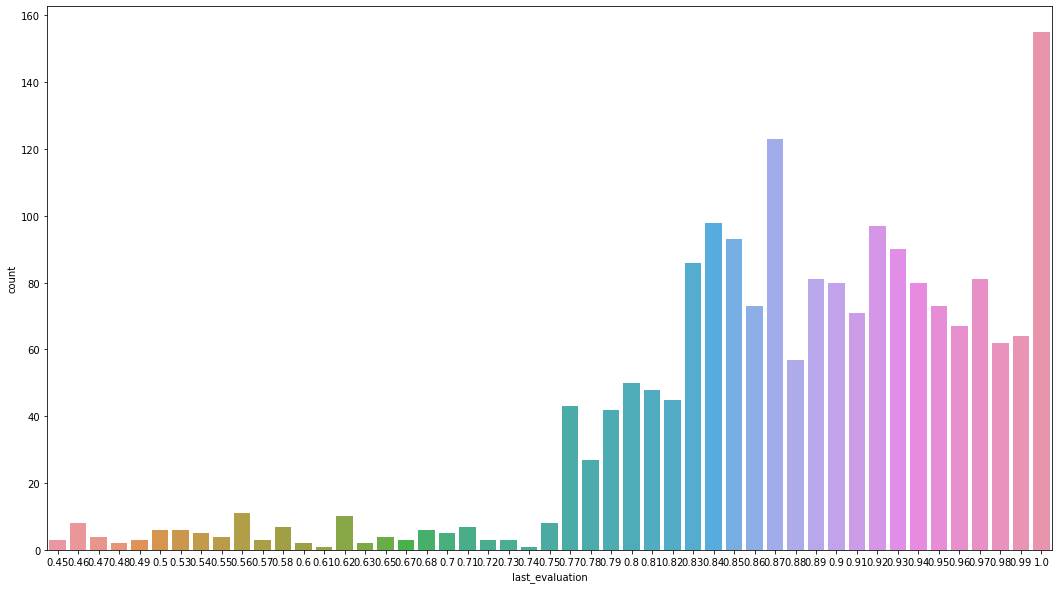

In [62]:
plt.figure(figsize=(18,10))
sns.countplot(df1["last_evaluation"])
plt.show()

In [63]:
from sklearn import preprocessing

In [64]:
le = preprocessing.LabelEncoder()

In [65]:
df["result"]=0
df1["result"]=1

In [71]:
df=pd.concat([df,df1])

In [72]:
df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,2013,0.48,0.94,5,255,6,0,0,accounting,medium,0
1,2014,0.73,0.62,3,218,3,0,0,accounting,medium,0
2,2015,0.59,0.87,3,268,4,0,0,accounting,medium,0
3,2063,0.72,0.94,4,240,4,0,0,accounting,low,0
5,2090,0.84,0.58,4,208,3,0,0,accounting,medium,0
...,...,...,...,...,...,...,...,...,...,...,...
1898,928,0.46,0.86,2,212,4,0,0,sales,medium,1
1899,1691,0.45,0.68,4,212,4,1,0,sales,low,1
1900,588,0.80,0.83,2,211,3,0,0,support,low,1
1901,12588,0.80,0.83,2,211,3,0,0,support,low,1


In [73]:
le.fit(df["salary"])
df["salary"]=le.transform(df["salary"])
le.fit(df["dept"])
df["dept"]=le.transform(df["dept"])

In [74]:
io=df.corr()
plt.figure(figsize=(18,10))

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<AxesSubplot:>

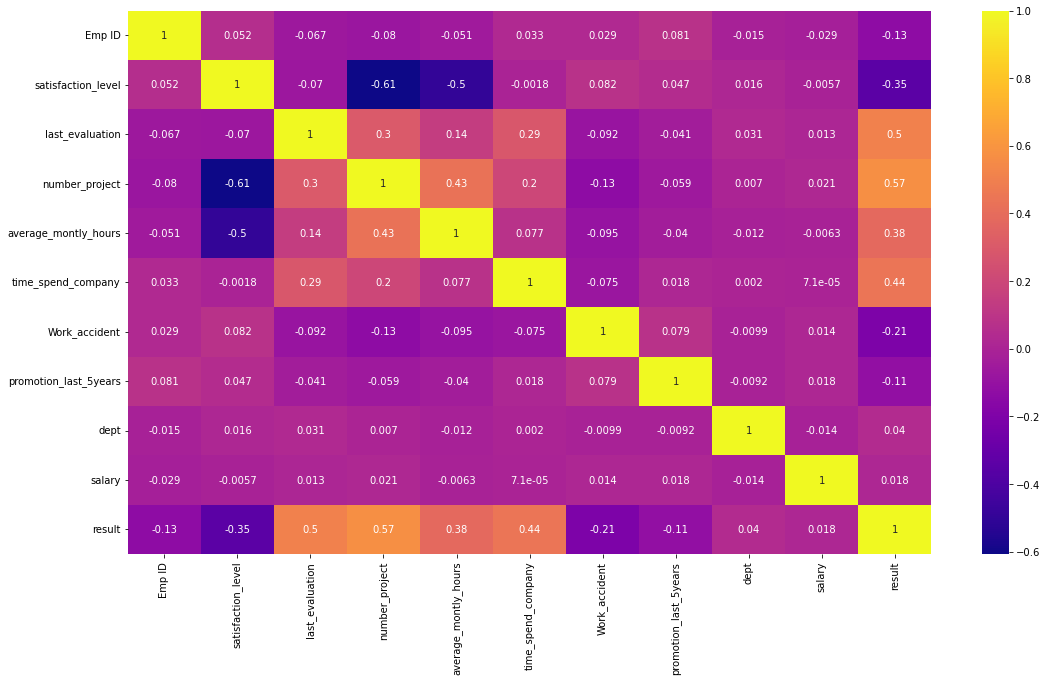

In [76]:
plt.figure(figsize=(18,10))
sns.heatmap(io,cmap="plasma",annot=True)

In [77]:
df
dfio=df[df["dept"]==7]

In [78]:
dfio=dfio[dfio["salary"]==1]

In [79]:
dfio

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
4605,2001,0.58,0.74,4,215,3,0,0,7,1,0
4608,2004,0.78,0.82,5,247,3,0,0,7,1,0
4609,2005,0.49,0.60,3,214,2,0,0,7,1,0
4614,2010,0.74,0.64,4,268,3,0,0,7,1,0
4618,2070,0.53,0.81,3,226,3,1,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1864,861,0.79,1.00,4,218,5,0,0,7,1,1
1865,866,0.82,0.85,5,218,5,0,0,7,1,1
1887,705,0.74,0.54,5,216,3,0,0,7,1,1
1889,12705,0.74,0.54,5,216,3,0,0,7,1,1


<AxesSubplot:xlabel='dept,salary'>

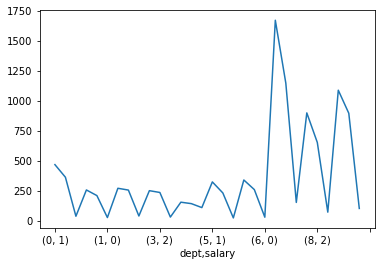

In [80]:
df.groupby(["dept"])["salary"].value_counts().plot()

In [82]:
plt.show()

In [84]:
#sns.pairplot(df)

In [85]:
df1

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,567,0.11,0.79,7,310,4,0,0,hr,low,1
1,804,0.10,0.77,6,310,4,0,0,technical,medium,1
2,810,0.11,0.97,7,310,4,0,0,support,medium,1
3,1060,0.70,0.93,2,310,3,0,0,product_mng,low,1
4,1229,0.10,0.85,7,310,5,0,0,marketing,low,1
...,...,...,...,...,...,...,...,...,...,...,...
1898,928,0.46,0.86,2,212,4,0,0,sales,medium,1
1899,1691,0.45,0.68,4,212,4,1,0,sales,low,1
1900,588,0.80,0.83,2,211,3,0,0,support,low,1
1901,12588,0.80,0.83,2,211,3,0,0,support,low,1


In [86]:
le.fit(df1["salary"])
df1["salary"]=le.transform(df1["salary"])

In [87]:
le.fit(df1["dept"])
df1["dept"]=le.transform(df1["dept"])

In [88]:
df1

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,567,0.11,0.79,7,310,4,0,0,3,1,1
1,804,0.10,0.77,6,310,4,0,0,9,2,1
2,810,0.11,0.97,7,310,4,0,0,8,2,1
3,1060,0.70,0.93,2,310,3,0,0,6,1,1
4,1229,0.10,0.85,7,310,5,0,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1898,928,0.46,0.86,2,212,4,0,0,7,2,1
1899,1691,0.45,0.68,4,212,4,1,0,7,1,1
1900,588,0.80,0.83,2,211,3,0,0,8,1,1
1901,12588,0.80,0.83,2,211,3,0,0,8,1,1


In [89]:
dfcp=df1[:]
del dfcp["Emp ID"]

In [90]:
pocorr=dfcp.corr()

<AxesSubplot:>

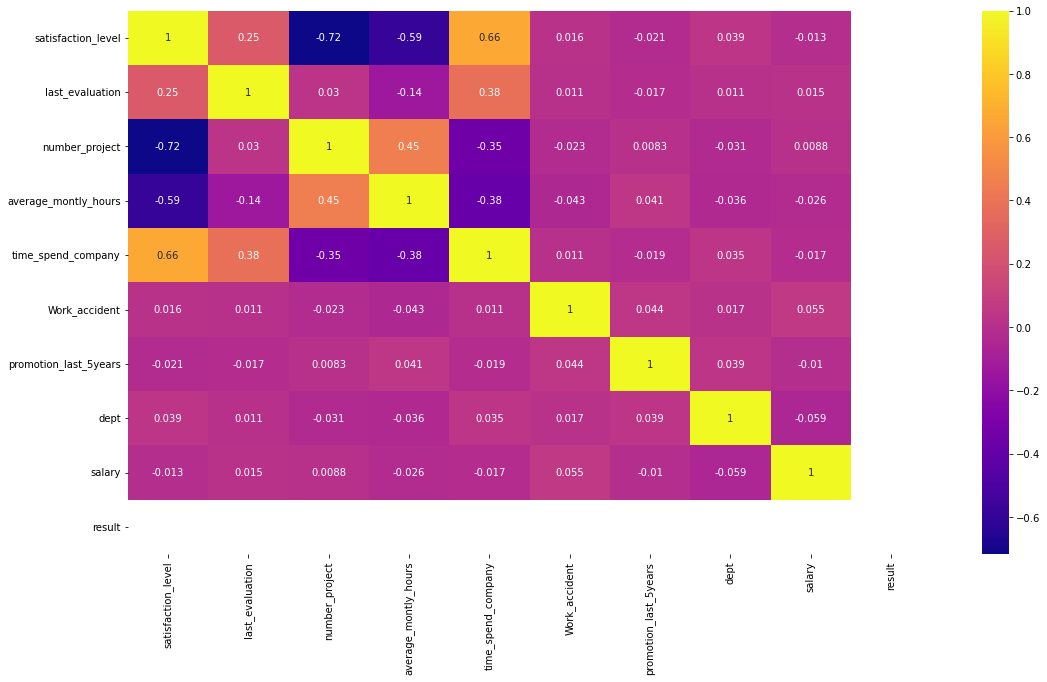

In [91]:
plt.figure(figsize=(18,10))
sns.heatmap(pocorr,annot=True,cmap="plasma")

In [92]:
print(Counter(df1["number_project"]))

Counter({6: 628, 5: 581, 4: 376, 7: 248, 3: 38, 2: 32})
